# Matplotlib
데이터 시각화는 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달하는 과정을 의미한다. 데이터 시각화는 데이터 분석가의 직관적인 이해를 청취자에게 전달할 수 있는 중요한 도구이다. 파이썬의 시각화 도구는 종류가 매우 다양하다. 그중에서 Matplotlib, seaborn, Plotly 등이 많이 사용되며 그 외에도 R에서 자주 사용되는 ggplot도 파이썬에서 사용할 수 있다. 먼저 Matplotlib에 대해 살펴본다.

---

### 1.Matplotlib의 구조
Matplotlib 모듈은 기본적으로 Matlab에서 사용되는 다양한 기능을 파이썬에서 그대로 사용할 수 있도록 해주는 시각화 도구이다. 일반적으로 넘파이를 포장(wrapping)해서 판다스를 지원하듯이 Matlab을 포장해서 맷플롯립을 지원하므로 Matplotlib에서 Matlab의 거의 모든 그래프를 사용할 수 있다.

In [10]:
import matplotlib.pyplot as plt

##한글 폰트
plt.rc('font', family='NanumGothic') 
%matplotlib inline
## minus sign 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#### 1-1.Pyplot
matplotlib를 이용할 때 가장 기본이 되는 구조는 **파이플롯(pyplot)** 이다. matplotlib에서 가장 기본이 되는 객체인 파이플롯 위에 **그림(figure)** 객체를 올리고 그 위에 그래프에 해당하는 **측(axes)** 을 올린다.  
조금 더 쉽게 생각하면 파이플롯은 그래프를 작성할 수 있게 준비해주는 화방과 같은 역할을 하여 다양한 그림을 그리는 도구들을 사용할 수 있게 해준다. 여기서 그림(figure)은 파이플롯 위에 올려진 그림판, 축(axes)은 최종적으로 그림판 위에 올려진 도화지 같은 존재이다.

<img src="plot1.png" alt="alt_text" style="display:block; margin-left:auto; margin-right:auto; width:600px; height:500px;" />

다음과 같이 두 개의 그래프를 이루는 점의 값이 쌍으로 있고 이를 차례대로 plot 함수 위에 입력하면 pyplot 객체 내부에 있는 **그림(figure)** 객체에 차례대로 그래프를 그리게 된다.  
먼저 코사인 그래프를 그린 후, 사인 그래프를 다시 그리면 두 그래프가 하나의 그림(figure) 객체 위에 그려진다.

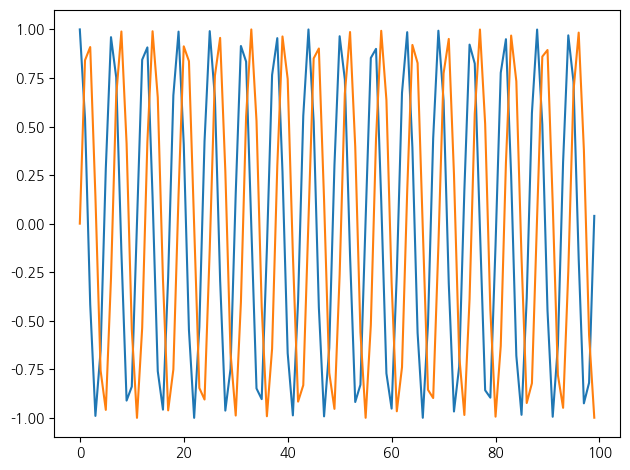

In [11]:
x=range(100)

y1=[np.cos(value) for value in x]
y2=[np.sin(value) for value in x]

plt.plot(x,y1)
plt.plot(x,y2)

plt.tight_layout()
plt.show()


#### 1-2.그림과 축
**그림(figure)** 은 그래프를 작성하는 밑바탕이 되는 툴이고, **축(axes)** 은 일종의 캔버스로 실제 그래프가 작성되는 공간이다. 다음과 같이 **subplots** 함수를 사용해서 확인한다.  
plot 함수를 사용하면 한 번에 그래프를 작성할 수 있지만, subplots 함수를 사용하면 그림 객체와 축 객체를 나눠서 받을 수 있다.

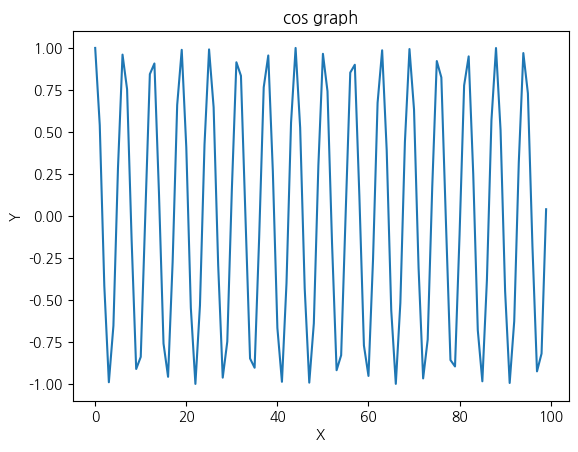

In [12]:
fig, ax = plt.subplots()             ## (1) 각각 변수 fig와 ax에 그림(figure)과 축(axes) 객체 할당        

x=range(100)
y=[np.cos(value) for value in x]

ax.plot(x,y)                         ## (2) 축(axes) 객체에 그래프를 작성하는 plot 함수를 사용해서 그래프 생성
ax.set(title='cos graph',            ## (3) 축(axes) 위에 그래프의 제목과 x,y 축 라벨 설정
       xlabel='X',ylabel='Y')

plt.show()                           ## (4) 그래프 출력

다음 코드를 보면 subplots 함수의 의미를 좀 더 명확히 이해할 수 있을 것이다.

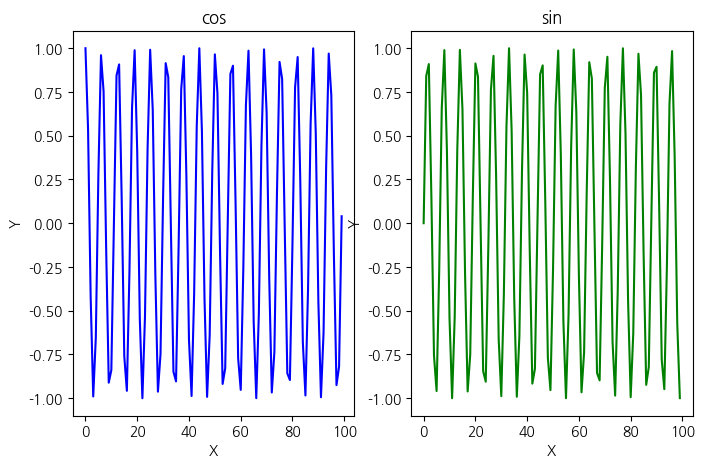

In [20]:
fig = plt.figure()           ##plt에서 기본 그림(figure) 객체 반환
fig.set_size_inches(8,5)   ##그림(figure)의 크기 지정

##figure 행은 1개, 열은 2개로 그림(figure) 객체 공간을 지정
ax1=fig.add_subplot(1,2,1)   ##첫 번째 축 객체를 ax1이라는 이름으로 축(axes) 객체 생성
ax2=fig.add_subplot(1,2,2)   ##두 번째 열에는 ax2라는 이름으로 축(axes) 객체 생성

#제목 지정
ax1.set(title='cos',xlabel='X',ylabel='Y')
ax2.set(title='sin',xlabel='X',ylabel='Y')

#각 축에 그래프 생성(c는 색(color))
ax1.plot(x,y1,c='b')
ax2.plot(x,y2,c='g')

plt.show()

#### 1-3.subplot matrix
축(axes)을 여러 개 만들 때 일반적으로 그림(figure) 객체에서 add_subplot 함수를 사용하거나 plot 객체에서 subplots 함수를 사용하여 먼저 축(axes) 객체 공간을 확보해야 한다. axes 객체는 **넘파이 배열(ndarray)** 타입으로 생성된다.  

**plt.subplots(nrow=n,ncol=m)** : 행이 **n개**이고 열은 **m개**인 그림(figure) 객체 공간을 생성하고 이를 하나의 행렬처럼 생각하여 두 개의 축(axes) 객체를 생성

[<Axes: > <Axes: >]
<class 'numpy.ndarray'>


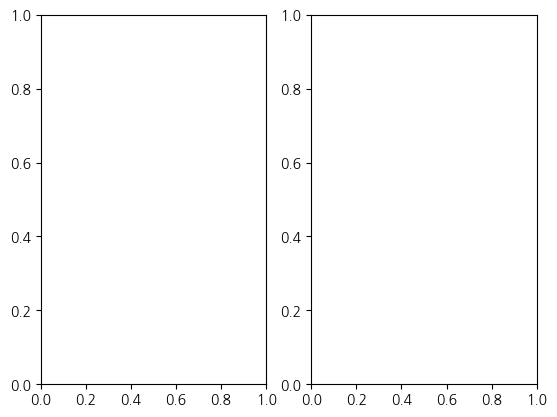

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=2)
print(ax)
print(type(ax))

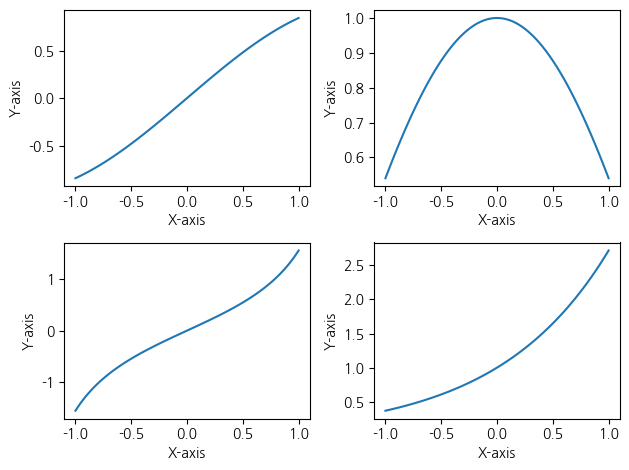

In [ ]:
x=np.linspace(-1,1,100)

y1=np.sin(x)
y2=np.cos(x)
y3=np.tan(x)
y4=np.exp(x)

fig,ax=plt.subplots(2,2)  ## 2*2 figure 객체 생성

ax[0,0].plot(x,y1)
ax[0,1].plot(x,y2)
ax[1,0].plot(x,y3)
ax[1,1].plot(x,y4)


# 모든 subplot에 동일한 xlabel과 ylabel 설정
for axi in ax.flat:                   ##ax.flat을 사용하면 2*2 배열을 일차원으로 변환하여 모든 axes 순회
    axi.set_xlabel('X-axis')
    axi.set_ylabel('Y-axis')

plt.tight_layout()  # 레이아웃 조정
plt.show()

---

### 2.그래프 꾸미기
matplotlib은 다양한 형태의 그래프 커스터마이징 기법을 제공한다.

#### 2-1.색상 : color
matplotlib에서는 **color** 또는 **c** 매개변수를 사용해서 색상을 변경할 수 있다. color 매개변수에 코드를 입력하는 방식은 크게 두 가지가 있다.   
1. RGB 값을 사용해서 #을 붙이고 16진법을 사용해서 색상 표시  
2. b,g,r,c 처럼 약어를 사용하여 색상 표시  
  
https://matplotlib.org/stable/gallery/color/named_colors.html : matplotlib 색상

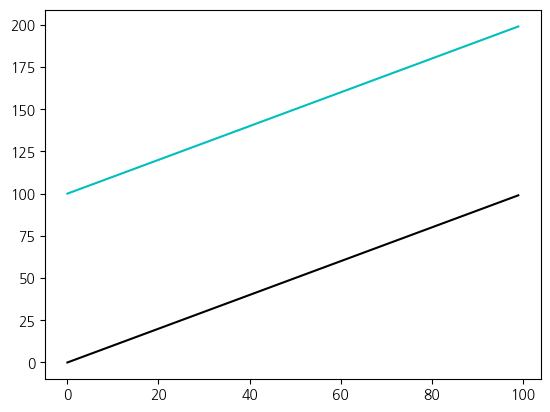

In [35]:
x=range(100)
y1=[value for value in x]
y2=[value+100 for value in x]

plt.plot(x,y1,color='#000000')
plt.plot(x,y2,c='c')

plt.show()

#### 2-2.선의 형태 : linestyle
선의 형태를 정의하는 매개변수는 **linestyle** 또는 **ls** 이다.  
선의 두께를 설정하고 싶으면 **linewidth** 매개변수로 변경할 수 있다.

https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/linestyles.html : matplotlib linestyle


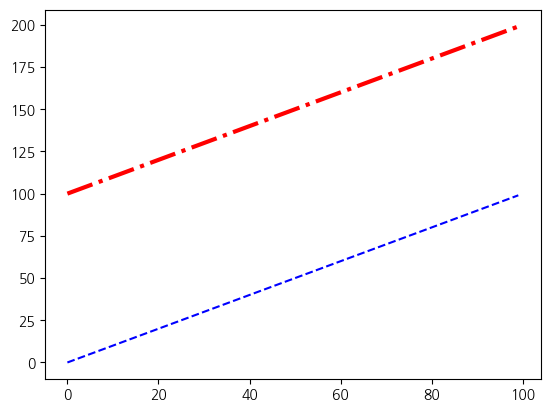

In [52]:
plt.plot(x,y1,c='b',linestyle='dashed')
plt.plot(x,y2,c='r',ls='dashdot',linewidth=3)

plt.show()

#### 2-3.제목 : title
축(axes) 객체마다 제목을 달 수 있다.

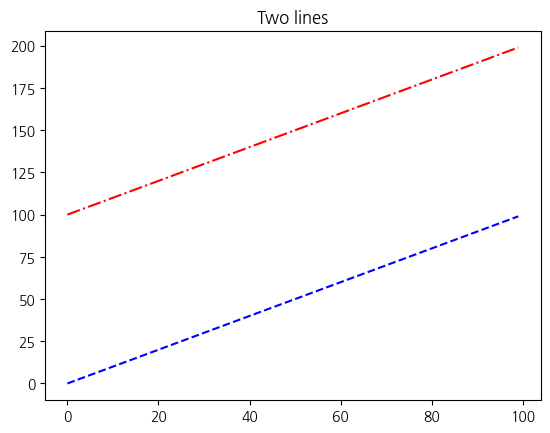

In [46]:
plt.plot(x,y1,c='b',linestyle='dashed')
plt.plot(x,y2,c='r',ls='dashdot')

plt.title('Two lines')
plt.show()

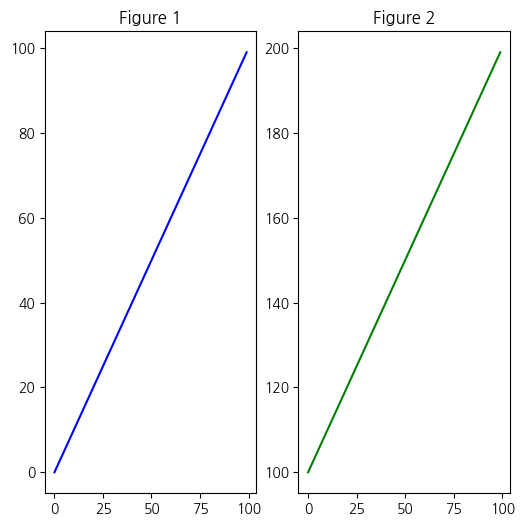

In [50]:
##각 축마다 제목 넣기
fig=plt.figure()
fig.set_size_inches(6,6)

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(x,y1,c='b')
ax1.set_title('Figure 1')

ax2.plot(x,y2,c='g')
ax2.set_title('Figure 2')

plt.show()

#### 2-4.범례 : legend
그래프에 대한 설명인 범례도 축(axes)별로 설정할 수 있다. **legend** 함수를 사용하면 범례를 생성할 수 있으며, **shadow** 매개변수를 사용하여 범례 뒤쪽에 그림자 효과를 추가할 수 있다. **loc** 매개변수로 범레의 위치를 지정할 수 있다.

Text(0, 0.5, 'y_line')

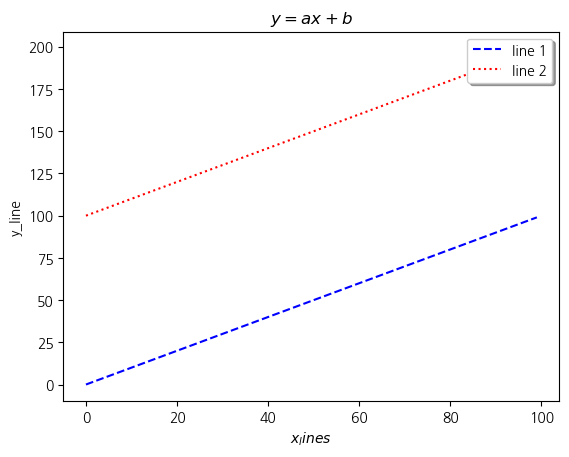

In [54]:
plt.plot(x,y1,color='b',linestyle='dashed',label='line 1')
plt.plot(x,y2,color='r',linestyle='dotted',label='line 2')

plt.legend(shadow=True,loc='upper right')

plt.title('$y = ax+b$')  ##Latex
plt.xlabel('$x_lines$')
plt.ylabel('y_line')

---

### 3.Matplotlib에서 사용하는 그래프
Matplotlib은 데이터의 특성에 맞는 다양한 그래프를 지원한다.

#### 3-1.산점도(Sccatterplot)
산점도는 일반적으로 데이터의 분포를 2차원 평면에 표현할 때 사용하는 그래프이다. X,Y 에 각각 좌표에 대한 정보를 담고, 이를 **scatter** 함수를 사용하여 그림에 생성한다. 매개변수로 c (색상), **marker(포인트 모양)** 등이 있다. 

https://matplotlib.org/stable/api/markers_api.html : matplotlib markers

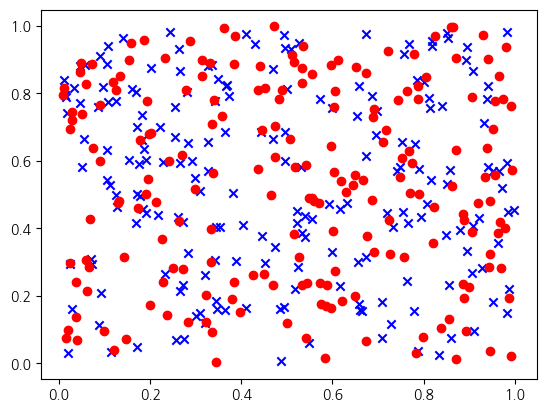

In [62]:
data1=np.random.rand(200,2)
data2=np.random.rand(200,2)

plt.scatter(data1[:,0],
            data1[:,1],
            c='b',marker='x')

plt.scatter(data2[:,0],
            data2[:,1],
            c='r',marker='o')

plt.show()

추가적으로 **s** 매개변수를 이용하면 **각 포인트**의 크기도 지정할 수 있다. 여기에서 alpha는 각 원의 불투명도를 지정하는 매개변수이다.

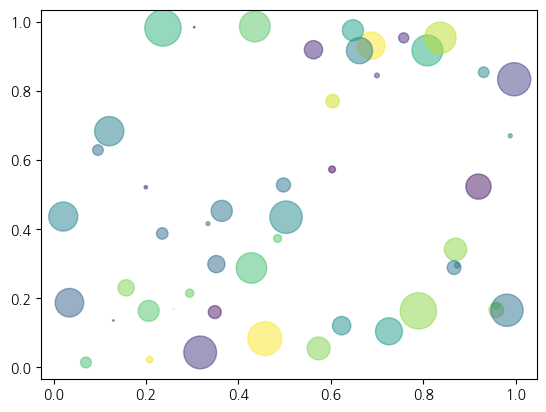

In [66]:
N=50
x=np.random.rand(N)
y=np.random.rand(N)

colors=np.random.rand(N)

area=np.pi*(15*np.random.rand(N))**2

plt.scatter(x,y,s=area,c=colors,alpha=0.5)

3차원 산점도 (3d-scatterplot)도 만들 수 있다. 하지만 **plotly** 라이브러리의 3차원 산점도가 훨씬 나으므로 여기선 코드만 보고 넘어간다.

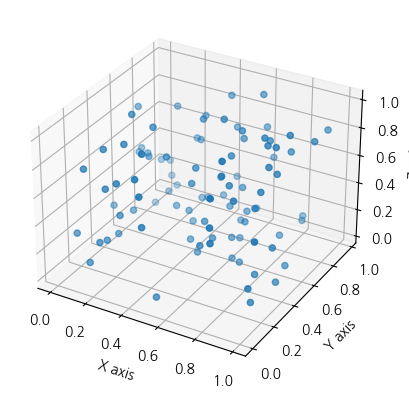

In [68]:
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# 3D 플롯 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도 그리기
ax.scatter(x, y, z)

# 축 레이블 추가
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


#### 3-2.막대그래프(barplot)
막대그래프(bar graph)는 일반적으로 데이터의 개수나 크기를 비교할 때 사용하는 그래프이다.

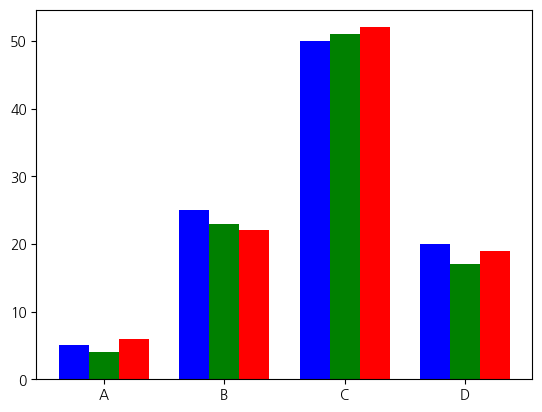

In [72]:
#(1):데이터 생성
data=[[5,25,50,20],
      [4,23,51,17],
      [6,22,52,19]]

#(2):X는 각 그래프가 표시되는 X좌표
x=np.arange(0,8,2)

#(3):3개의 막대그래프 생성,width로 각 막대의 크기 지정
plt.bar(x,data[0],color='b',width=0.5)
plt.bar(x+0.5,data[1],color='g',width=0.5)
plt.bar(x+1,data[2],color='r',width=0.5)

#(4):X축에 표시될 이름과 위치,xticks는 X축에 표시될 이름과 위치 지정함수
plt.xticks(x+0.5,('A','B','C','D'))

plt.show()

#### 3-3.누적 막대그래프
누적 막대그래프(stacked bar graph)는 데이터를 밑에서부터 쌓아올려서 데이터를 표현할 때 사용한다. 다음 코드에서 변수 data에 있는 값은 위로 데이터를 추가하는 형태이다. 이를 위해 for문을 사용한 loop을 통해 i의 값, 여기서는 막대 상에서 아랫부붙까지 더한 다음 그 값을 bottom에 넣는다.

In [76]:
data=np.array([[5,25,50,20],
               [4,23,51,17],
               [6,22,52,19]])

color_list=['b','g','r']
data_label=['A','B','C']

X=np.arange(data.shape[1])

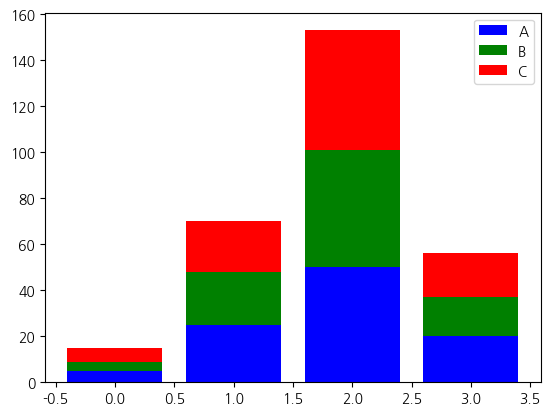

In [82]:
for i in range(3):
    plt.bar(X,data[i],bottom=np.sum(data[:i],axis=0),color=color_list[i],label=data_label[i])
    
plt.legend()
plt.show()

#### 3-4.히스토그램(histogram)
**히스토그램(histgram)**은 데이터의 분포를 표현하는 그래프이다. 매개변수 bins로 히스토그램에서 생기는 막대의 개수를 지정하면 그 개수만큼 그래프가 작성된다.  
히스토그램을 만들 때, bin의 크기와 개수는 매우 중요한 문제이다. 비모수통계학에서 살펴보면 bins의 개수에 따라 분포의 **편향(bias)와 분산(variance)** 이 달라진다. 또한 히스토그램과 **density line**을 같이 사용하는 것을 추천한다. density line은 다음에 배울 **seaborn** 라이브러리의 **kdeplot (kernel density estimate plot)** 함수를 사용하면 같이 그릴 수 있다.

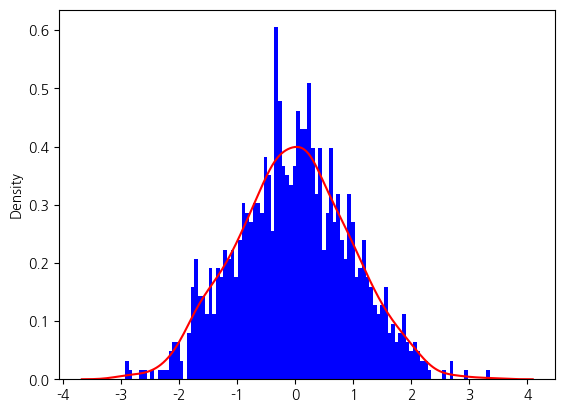

In [88]:
import seaborn as sns


N=1000
X=np.random.normal(size=N)
sns.kdeplot(X,color='r')


plt.hist(X,bins=100,density=True,color='b')  ##density를 True로 하면 상대도수를 보여준다.
plt.show()

#### 3-5. 박스플롯(boxplot)
**박스플롯(boxplot)** 은 데이터의 분포를 나타내면서 밀집 정도를 표현하는 그래프이다. 박스플롯은 처음 1사분위수(Q1) 부터 3사분위수(Q3)까지의 데이터를 중앙에 박스 형태로 위치시킨다. 해당 데이터에서 Q3-Q1을 **IQR(InterQuartile Range)** 라고 부른다.  IQR 범위 밖에 있는 값들을 일반적으로 **이상치(Outlier)** 라고 표현한다. 

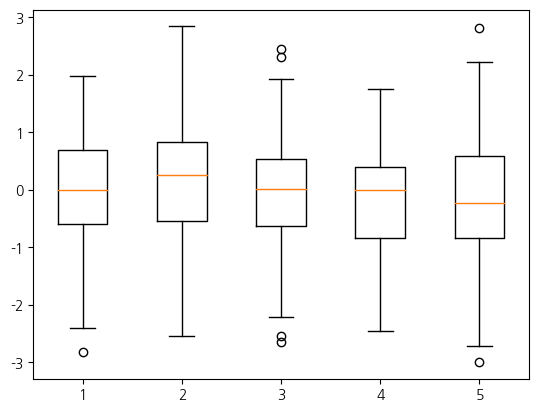

In [91]:
data=np.random.randn(100,5)

plt.boxplot(data)
plt.show()

이외에도 무수히 많은 시각화가 가능하다. matplotlib 홈페이지에서 다양한 plot을 확인할 수 있으며 한 번 살펴보는 것 권장한다.   
**matplotlib** : https://matplotlib.org/stable/